## **Depression Detection in Twitter**
The project will discuss the depression detection in twitter. The live data from twitter is extracted using twint. The steps required for the analysis is described in the following code.

In [1]:
#Installing twint
!pip install  --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-mqocyk3j/twint_108a06fa8d504fde849d02dbdd4c107f
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-mqocyk3j/twint_108a06fa8d504fde849d02dbdd4c107f
  Running command git checkout -q origin/master
     |████████████████████████████████| 1.1 MB 4.2 MB/s 
     |████████████████████████████████| 263 kB 39.8 MB/s 
     |████████████████████████████████| 372 kB 53.8 MB/s 
     |████████████████████████████████| 291 kB 47.6 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 58.4 MB/s 
     |████████████████████████████████| 271 kB 53.8 MB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 138 kB 47.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for twint: filename=t

In [2]:
#Installing necessary libraries
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import date
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import twint
import nest_asyncio
import nltk
import keras
!pip install tweet-preprocessor
import preprocessor as p
from gensim.models import KeyedVectors

from nltk.stem import PorterStemmer


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [3]:
nest_asyncio.apply()

Creating a twint object to extract tweet from twitter without using twitter API. Here 10000 tweets with keywords depression and lonely are scrapped from twitter.

In [4]:
c = twint.Config()
c.Search = 'depression' or 'lonely'
c.Limit = 10000
c.Pandas = True

In [5]:
twint.run.Search(c)

1516451684331012102 2022-04-19 16:20:30 +0000 <MlKROKOSMAZE> twt is so funny cause somebody could tweet, “depression and anxiety literally ruin your life but yall are not ready for that conversation” and get like 200K
1516451683039170562 2022-04-19 16:20:30 +0000 <sassyexcourt> If a fucking shame ray newland breaks up with me because I have depression and manic bipolar.he thinks it's a switch u can turn on and off..I hope you get what come to you. The truth is that he is talking to someone else.  https://t.co/uhgwaUVhuv
1516451664579993614 2022-04-19 16:20:25 +0000 <Siobhan12Leigh> Honestly starting to feel that the only way to stop my pain is to leave this world, then I realise I'm not a quitter 😔 #depression #pain #SuicideAwareness #heavyheart
1516451630052487170 2022-04-19 16:20:17 +0000 <TheTripp21> @WellReadBeard I thought the idea was a good one, something different. Execution was off. Maybe because they didn’t go all into the dark depression tone and skimmed it? The target audie

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516424247815639044 2022-04-19 14:31:29 +0000 <theheartofearl> I pay attention to those that fwm when I’m happy &amp; feel good &amp; those that leave me alone to deal with my depression. It’s all noted.
1516424203792265222 2022-04-19 14:31:18 +0000 <athleteswalk> "We are now in the midst of the sixth major extinction event. Could this be a factor contributing to the increase in depression, anger and polarization in society?"  #FridaysForFuture #OldGrowth #AncientForest #ProtectOurForests   https://t.co/LmEAPdmAI8
1516424187426279425 2022-04-19 14:31:14 +0000 <DoronDivine> ayaw ko na sa earth. i have a depression now fuck my self
1516424166404239360 2022-04-19 14:31:09 +0000 <looking4alyshea> That depression hitting me hard today, makes me want to relapse so bad
1516424140399738887 2022-04-19 14:31:03 +0000 <shonventard> Bringing back kite like this was kinda disrespect to the depression we got from his d3@th.
1516424114952712211 2022-04-19 14:30:57 +0000 <DaloneySandwich> Found out I 

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


Streaming output truncated to the last 5000 lines.
1516340983637712902 2022-04-19 09:00:37 +0000 <JennieEdmondson> Regular physical activity can help keep your thinking, learning, and judgment skills sharp as you age. It can also reduce your risk of depression and anxiety and help you sleep better. #laptopmums #simplethings #giveit10 #HealthTip  https://t.co/CF5sB4osBm
1516340889748066313 2022-04-19 09:00:15 +0000 <hugeba1ls> i believe that homestuck is the sole cause of the downfall of humanity, the influx of depression, and the statistical increase of unemployment
1516340882521346052 2022-04-19 09:00:13 +0000 <portsmouthCCG> The NHS is here to help. Feelings of anxiety and depression can affect us all. If you need help with your mental health, you can refer yourself, or your GP can refer you.   Let us help you get your feet back on the ground. Go to  https://t.co/tu6lqWHFAQ  https://t.co/txdtJTV6x4
1516340871511293952 2022-04-19 09:00:10 +0000 <capnstars> @cxptainflint Yeeeep me too,

In [6]:
#scrapped tweets is loaded into the dataframe
df1 = twint.storage.panda.Tweets_df

In [7]:
df1.head(5)

id      conversation_id    created_at  \
0  1516451684331012102  1516451684331012102  1.650385e+12   
1  1516451683039170562  1516451683039170562  1.650385e+12   
2  1516451664579993614  1516451664579993614  1.650385e+12   
3  1516451630052487170  1516450442800246791  1.650385e+12   
4  1516451627301052422  1516451627301052422  1.650385e+12   

                  date timezone place  \
0  2022-04-19 16:20:30    +0000         
1  2022-04-19 16:20:30    +0000         
2  2022-04-19 16:20:25    +0000         
3  2022-04-19 16:20:17    +0000         
4  2022-04-19 16:20:16    +0000         

                                               tweet language  \
0  twt is so funny cause somebody could tweet, “d...       en   
1  If a fucking shame ray newland breaks up with ...       en   
2  Honestly starting to feel that the only way to...       en   
3  @WellReadBeard I thought the idea was a good o...       en   
4  Par Daily Geek Show : Cette activité améliore ...       fr   

                                           hashtags cashtags  ...  geo source  \
0                                                []       []  ...               
1                                                []       []  ...               
2  [depression, pain, suicideawareness, heavyheart]       []  ...               
3                                                []       []  ...               
4                                                []       []  ...               

  user_rt_id user_rt  retweet_id  \
0                                  
1                                  
2                                  
3                                  
4                                  

                                            reply_to retweet_date translate  \
0                                                 []                          
1                                                 []                          
2                                                 []                          
3  [{'screen_name': 'WellReadBeard', 'name': 'Wel...                          
4                                                 []                          

  trans_src  trans_dest  
0                        
1                        
2                        
3                        
4                        

[5 rows x 38 columns]

In [8]:
#Dropping unnecessary attributes for further analysis
df_d = df1[['id','date','tweet','username']]

In [9]:
#Assigning 0 to target attribute in depression dataframe
df_d['target'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df_d

id                 date  \
0      1516451684331012102  2022-04-19 16:20:30   
1      1516451683039170562  2022-04-19 16:20:30   
2      1516451664579993614  2022-04-19 16:20:25   
3      1516451630052487170  2022-04-19 16:20:17   
4      1516451627301052422  2022-04-19 16:20:16   
...                    ...                  ...   
9998   1516202007857672194  2022-04-18 23:48:23   
9999   1516201976144424960  2022-04-18 23:48:15   
10000  1516201959103029248  2022-04-18 23:48:11   
10001  1516201958218031106  2022-04-18 23:48:11   
10002  1516201942237786112  2022-04-18 23:48:07   

                                                   tweet         username  \
0      twt is so funny cause somebody could tweet, “d...     MlKROKOSMAZE   
1      If a fucking shame ray newland breaks up with ...     sassyexcourt   
2      Honestly starting to feel that the only way to...   Siobhan12Leigh   
3      @WellReadBeard I thought the idea was a good o...       TheTripp21   
4      Par Daily Geek Show : Cette activité améliore ...         netguide   
...                                                  ...              ...   
9998   @FoxToons99 Beyond having asperger’s, Enter al...  oldschoolquimby   
9999   realizing my depression is getting worse each day       sadgorl222   
10000  I believe Everyone who suffered from Depressio...    DaneishaFaeva   
10001  my coworker is getting another psych eval for ...         zanaruza   
10002       My depression so bad I'm surprised I'm alive  digitallcaveman   

       target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9998        0  
9999        0  
10000       0  
10001       0  
10002       0  

[10003 rows x 5 columns]

Extracting 10000 tweets for neutral dataset with key words unbiased or impartial

In [11]:
b = twint.Config()
b.Search = 'unbiased' or 'impartial'
b.Limit = 10000
b.Pandas = True

In [12]:
twint.run.Search(b)

1516453348144304135 2022-04-19 16:27:07 +0000 <supportUAnews> (5/5) He noted the high level of independence of the Ukrainian media and the importance of providing Ukrainians with access to verified and unbiased sources of information during the war. #StandWithUkraine #SupportUA #UnitedNews #SupportUAUnitedNews
1516453202967023617 2022-04-19 16:26:32 +0000 <bappaurchildtc> #TejasswiPrakash #TejaTroops #TejRan who r unbiased can support
1516453118271270920 2022-04-19 16:26:12 +0000 <nbaunbiased7> @JorUpnext @forthefacts @IvanIvanlvan Lol I’m not a Celtic I just wanted an unbiased opinion on the series, I’m a big KD fan trust me I want the Nets to win. Nash just makes me nervous
1516453112441184259 2022-04-19 16:26:10 +0000 <Nodoubt110> @timmyvoe I cannot remember when they last supplied accurate, unbiased information!
1516453104375328769 2022-04-19 16:26:09 +0000 <BigTigerFitness> @johnthomas1536 @timkellernyc Your first statement is actually a statement of faith: Faith that the reports 

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516216928871886856 2022-04-19 00:47:40 +0000 <xx_kingjour> narrative based voting lol. aint even mad at the marcus smart campaign, just hilarious when voters try to act like they are completely unbiased.
1516216598083768324 2022-04-19 00:46:21 +0000 <RobRodman1234> Ex press here too &amp; I am in disbelief at the lack of unbiased reporting by all media incl. @abcnews Never thought I'd see the day &amp; I am gutted. #ausvotes #medialies
1516216511874146309 2022-04-19 00:46:01 +0000 <iLavellan> @trAsh_Lilly @Trippy_shack @tinywienerbabe And for a totally unbiased take, let’s speak to the perpetrator himself 💀 it’s like saying “oh Ted Bundy did an interview and said he didn’t ACTUALLY kill those women” 🙄
1516216496892133385 2022-04-19 00:45:57 +0000 <unbiased_LFC> @lelouchdagoat @IhNafis @Petite_midget_ @sakib_lfc @CulePique3 @TheEuropeanLad Not a troll
1516216448741515265 2022-04-19 00:45:45 +0000 <unbiased_LFC> @lelouchdagoat @sakib_lfc @CulePique3 @TheEuropeanLad You didnt name a sing

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


Streaming output truncated to the last 5000 lines.
1515854679514640384 2022-04-18 00:48:13 +0000 <Unbiased90> @Sophiagibson104 Sexy ass
1515854592969359364 2022-04-18 00:47:52 +0000 <ZachKimble1> @UnbiasedFAT @Unbiased_Katie I have a question. Where's the evidence in this? I meat plenty of male and female journalists wannabes who lie about their posts and act like they're always right when it's 100% wrong and I did the research and called them out and I'm bad. Just cause I'm male doesn't make me evil
1515854546056142853 2022-04-18 00:47:41 +0000 <UnBiasedTvMedia> @NabiyaKhan11 @zoo_bear @vinodkapri @alishan_jafri @HindutvaWatchIn @RanaAyyub @IAMCouncil @IamOnir @IlhanMN @KashifKakvi @asadowaisi @Aakar__Patel @AnisPFI
1515854345572536329 2022-04-18 00:46:53 +0000 <UnbiasedBoxing1> @cargilb That’s what I said. But if you listen he said “stop no” and then jumped back which confused both fighters lol
1515854324529827842 2022-04-18 00:46:48 +0000 <corviasayitall> @the_REALization @r_negus @

In [13]:
#loading tweets into the dataframe
df2 = twint.storage.panda.Tweets_df

In [14]:
#Dropping unnecessary attributes for further analysis
df_n = df2[['id','date','tweet','username']]

In [15]:
#Assigning 2 to target attribute in neutral dataframe
df_n['target'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_n

id                 date  \
0      1516453348144304135  2022-04-19 16:27:07   
1      1516453202967023617  2022-04-19 16:26:32   
2      1516453118271270920  2022-04-19 16:26:12   
3      1516453112441184259  2022-04-19 16:26:10   
4      1516453104375328769  2022-04-19 16:26:09   
...                    ...                  ...   
9997   1515302849009250306  2022-04-16 12:15:26   
9998   1515302807267872769  2022-04-16 12:15:16   
9999   1515302680352206858  2022-04-16 12:14:46   
10000  1515302667983425538  2022-04-16 12:14:43   
10001  1515302514152910851  2022-04-16 12:14:06   

                                                   tweet         username  \
0      (5/5) He noted the high level of independence ...    supportUAnews   
1      #TejasswiPrakash #TejaTroops #TejRan who r unb...   bappaurchildtc   
2      @JorUpnext @forthefacts @IvanIvanlvan Lol I’m ...     nbaunbiased7   
3      @timmyvoe I cannot remember when they last sup...       Nodoubt110   
4      @johnthomas1536 @timkellernyc Your first state...  BigTigerFitness   
...                                                  ...              ...   
9997   @naveenjindalbjp That should be happiest momen...  Unbiased_Media_   
9998                              #امپورٹڈ_حکومت_نامنظور    unbiasedmalik   
9999   I haven't seen any @Meta news about the #Metav...    OldAndUnusual   
10000  It's a convenient, effective, easy way to unde...       philoTruth   
10001  @MoeedNj Why r u being the mouthpiece of PTI. ...    taimoor_khaan   

       target  
0           2  
1           2  
2           2  
3           2  
4           2  
...       ...  
9997        2  
9998        2  
9999        2  
10000       2  
10001       2  

[10002 rows x 5 columns]

Scrapping 10000 tweets for positive dataset using keywords happy or love

In [21]:
a = twint.Config()
a.Search = 'happy' or 'love'
a.Limit = 10000
a.Pandas = True

In [22]:
twint.run.Search(a)

1516456869904084997 2022-04-19 16:41:06 +0000 <jaejakeuu> happy birthday my comfort person, you really deserves the whole world park jongseong 🥹🫶🏻  OUR JAYPRIL LOVE  #BelovedBirthJAY #제이의_생일을_쫑말쫑말_축하해 #JAY #제이 @ENHYPEN_members @ENHYPEN
1516456869120069633 2022-04-19 16:41:06 +0000 <kmmmzz> i just want to be happy 🙂
1516456868797104140 2022-04-19 16:41:06 +0000 <LoeycityxX__> @shxun7lu Gas lumayan nambah ots  Happy Birthday Lu Han 💛  #LuhanBDay2022 #SlowRideWithLU #HappyLuHanDay #루한의_33세년_슬로라이드
1516456868788506624 2022-04-19 16:41:06 +0000 <jimmy_fisher9> @timotierney Happy birthday Timo. Sounds a belter upto now mate. 🍺🍺🍺🍺
1516456868478177292 2022-04-19 16:41:06 +0000 <shy_flames_01> @Nakios_ Happy bday!!
1516456867190300672 2022-04-19 16:41:06 +0000 <aliemagiliw> first time ng pinsan kong makarinig ng happy birthday na may malupitang ad libs @alamat_official @alamat_members, natulala tuloy HAHAHAHAHAHH 😭  @Official_ALAMAT #ALAMAT #ALAMAT_SPNL #AlamatSPNL_recording  https://t.co/o23RZ1

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516456631063965698 2022-04-19 16:40:09 +0000 <ksnrkey> @enhazfeed happy birthday
1516456630983938061 2022-04-19 16:40:09 +0000 <lugeyaaa> Happy birthday bi ♡  #Happyluhanday #LuhanBDay2022  https://t.co/htAnGp5MAU
1516456630677770242 2022-04-19 16:40:09 +0000 <louhunnie> happy 2 years sa vidyow na itwoah!!! nakikita tlg kung sino ang favorite ni lord sa mundong ibabaw!!! at si luhan yon!!!   https://t.co/7gitvFlYbj
1516456629520150531 2022-04-19 16:40:09 +0000 <chephsteph> @oreokittykat Happy birthday Oreo.
1516456628890996736 2022-04-19 16:40:09 +0000 <caurtq> @ENHYPEN happy day ! 💘 te amo mucho
1516456627792224261 2022-04-19 16:40:09 +0000 <wacloudsnia> Happy Birthday| @mongisontandahimba  Tunakutakia maisha mema na yenye mafanikio katika mwaka 2022. #mcloudsania  #Kuwaunachotakamara22  https://t.co/ArNBarfEnP
1516456627448295424 2022-04-19 16:40:09 +0000 <MSobhy16331159> @AlexChancexxx Happy birthday to you
1516456627347591182 2022-04-19 16:40:09 +0000 <tefifi_> Happy birthday Jay.

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516456621064347652 2022-04-19 16:40:07 +0000 <darshanhdIN> Happy birthday ಗೆಳೆಯ Shreyank Halanur god bless you  https://t.co/WMgJ59BsMa
1516456621039398912 2022-04-19 16:40:07 +0000 <barbvrmyj> @spxingdays Listen to #PermissionToDance the #BTS song that makes us happy! @BTS_twt
1516456621031190529 2022-04-19 16:40:07 +0000 <AlipJr18> @jscmine @megsgives Done all rules☑️ Bismillahirrahmanirrahim. Really hope to win🥇🏆wish me luck, manifesting to win🙏thank you for holding a giveaway. i hope you always be happy, healthy and many good things come to you !🤩❤️  https://t.co/ks5Yzbn9vs
1516456620141686795 2022-04-19 16:40:07 +0000 <lutzlooplulu> Do i go to skate america now that i will be a northeast bitch come september
1516456620011966473 2022-04-19 16:40:07 +0000 <Happy_Merura> いええええええええええええええええええええええええええええええええええええええええええええええええええいっっ！！！めっちゃほおおおりいいいでえええええええええええええええええええええええええええええええええええええええええええええええっっっ！！！！！！！
1516456619567104009 2022-04-19 16:40:07 +0000 <skzbt1> Happy birthday to our sunshine b

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516456345830309895 2022-04-19 16:39:01 +0000 <FBuaket> ตามหาคนอยากลดน้ำหนัก เคยกินยาลดน้ำหนักมาก่อน คุณแม่หลังคลอด สายกินห้ามใจไม่ได้ สนใจ DM เข้ามาสอบถามได้ฟรี #มายอาโป #TheBatmanHBOGo #มายหยุดเฟคนิวส์ #ห้าปีแล้วแต่งได้หรือยัง #ทายาทพันธุ์ข้าวเหนียวep43  https://t.co/JqsY4h5SoY
1516456345301618693 2022-04-19 16:39:01 +0000 <itslorne> HAPPY BIRTHDAY PIETRO🥳  #AnimalCrossingNewHorizons #ACNH  https://t.co/hXPLuD5ku5
1516456345205096449 2022-04-19 16:39:01 +0000 <wesking72> @BarchokHillary We are happy for her and sad 😭😭 for the governor elect.
1516456344903364609 2022-04-19 16:39:01 +0000 <GUANXIAOTONG_TH> 220419 | Weibo update🦋  [ Trans ] สุขสันต์วันเกิด~@M鹿M🎂  _______________________________________ Happy Birthday นะคะเฮียลู่หาน🎉🎂  ©️: Weibo@关晓彤 🖇️ https://t.co/9KtOn7iy4v  #กวนเสี่ยวถง #GuanXiaoTong  #关晓彤 #GabrielleGuan  https://t.co/NscvAOvXsa
1516456343011577865 2022-04-19 16:39:01 +0000 <royal_reporter> @ukinnl @nl_British @InvictusGamesNL @HelpforHeroes @WeAreInvictus It's so won

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516455858116640769 2022-04-19 16:37:05 +0000 <everyonedk> @hanlovu Happy birthday kak my best wishes for you kak rafa💖💖
1516455857940307973 2022-04-19 16:37:05 +0000 <Cerulikat> @Wiishu Happy Birthday, Signe! Have yourself a truly magnificent day! You awesome✨🎂🥳📸🌷✨
1516455857625923584 2022-04-19 16:37:05 +0000 <HappyLife_sugar> @__maybe__0 僕も同期や先輩に気になったこと聞いてるから気にせぇへんでええと思うで
1516455857537667072 2022-04-19 16:37:05 +0000 <helleboreweep> @shourotonin happy birthday !!!!!
1516455856468017152 2022-04-19 16:37:05 +0000 <JustSabina23> @PapiKayyyy Fine people!!! Happy Anniversary 🎊 🎉, many more beautiful years to come in Jesus name 🙏🏽
1516455856350457857 2022-04-19 16:37:05 +0000 <jongseongjunjae> HAPPY BIRTHDAY TO MY FAV PERSON, LOVE YOU SMM!!!
1516455856300335114 2022-04-19 16:37:05 +0000 <DennisAndDoris1> @MillieGangs Happy gotcha day pal!!  https://t.co/4vJ9WNk3md
1516455856178712576 2022-04-19 16:37:05 +0000 <thewintermia> @buckytomboy happy birthday 🥳🥳🥳  https://t.co/K4YJQQegJd
15164558

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516455283975163907 2022-04-19 16:34:48 +0000 <hamster_jwi> #HappyBirthdayJay lumalaki kana😭 dati Todo cheer ako sayo since iland and ngayon successful kana sa pagiging kpop idol I really so proud of you jay! Happy birthday ulit jay!! Enjoy your birthday!!!  https://t.co/ISXjSpP6rG
1516455283530539010 2022-04-19 16:34:48 +0000 <Be4trxce> hap hap happy birthday Jay ♡  - แจกเงิน 399฿/1คน  - สุ่มโดนฟลว.+50฿ ถ้าเป็นทั้งเอนจีนและฟลว.+100฿  - สุ่มวันศุกร์ 20:00 น.แท็กเรียกรงต.ภายใน5นาที  #HAPPY_BIRTHDAY_JAY #BelovedBirthJAY #제이의_생일을_쫑말쫑말_축하해 #생일축하해 #사월에_태어난_깜장고양이 #모두의_행복을_바라는_월남  https://t.co/IMVjhswwm0
1516455282796556291 2022-04-19 16:34:48 +0000 <xinliu_1997> Happy Birthday Yuxin My Queen!!   XIN IN XANADU #HappyXINday #HBD_XINLiu_0420  https://t.co/S3ST04y4mr
1516455282502602754 2022-04-19 16:34:48 +0000 <grievancequeen> Americans mentality is to play hard with public health. Still spreading and people so happy to shed mask.
1516455282213150721 2022-04-19 16:34:48 +0000 <DzuiDze88> Lets 

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516453891247730690 2022-04-19 16:29:16 +0000 <duplicitybullet> @aklovestay HAPPY 1.2 SLAY
1516453890555797514 2022-04-19 16:29:16 +0000 <SkilliterStan> @MizReformed That’s awesome I’m so happy for you!
1516453890547408905 2022-04-19 16:29:16 +0000 <monocerostart> @justawannaberyl YEAH IT WAS!! EVERYONE WAS SO HAPPY
1516453890296025090 2022-04-19 16:29:16 +0000 <nshinck> happy birthJAY 🥹🫶🏻
1516453890199552000 2022-04-19 16:29:16 +0000 <hellocloudnine_> @cryptoandee @UpDeFiUp Well, I am happy to know about this project! Looking forward fot this one to be successful! 📈✨
1516453890128060422 2022-04-19 16:29:16 +0000 <kenyansanta> @omwambaKE And the whe world is happy😁united fans gather here
1516453890115444740 2022-04-19 16:29:16 +0000 <donisparkles> Omg. I'm so late but Kaguya-Sama: Love is war already released its Season 3. Okay okay! I'm happy! 🥹👏🏻👏🏻🎉🎉🥰
1516453890023038981 2022-04-19 16:29:16 +0000 <lheeseung01_> Spending my birthday with my bday buddy Jongseong Park! Happy birthday sa

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1516453678110150665 2022-04-19 16:28:25 +0000 <__KryssA> Happy Taco Tuesday!  Shop our “Taco Tuesday “ Seasoning at    https://t.co/xijyzCKVbM
1516453677812363272 2022-04-19 16:28:25 +0000 <nishimiau> happy birthday jay, thank you for being my strength &lt;3  OUR JAYPRIL LOVE #BelovedBirthJAY  #제이의_생일을_쫑말쫑말_축하해 @ENHYPEN_members @ENHYPEN  https://t.co/t0TZnKK5kR
1516453677737066498 2022-04-19 16:28:25 +0000 <jwseung> @wonciety HAPPY  BIRTHDAY  BES
1516453677510586368 2022-04-19 16:28:25 +0000 <Ot_sevenhypen> Happy Birthday Jay!!🤍🤍🤍 Engenes love u so much🦋  https://t.co/n0ftvjE5WF
1516453676583616512 2022-04-19 16:28:25 +0000 <dearjaane> to the boy with chapped lips and a scarred nose, the boy who ugly cried in a tv show, the boy who doubted himself and wrote farewell letters with swollen hands, my evergreen, and ni-ki's apparang, happy birthday jayjay!  @ENHYPEN_members #JAY #BelovedBirthJAY #HAPPYBIRTHDAYJAY  https://t.co/OUw16H38Qi
1516453676528934918 2022-04-19 16:28:25 +0000 <Beomgy

In [23]:
#loading tweet information in dataframe
df3 = twint.storage.panda.Tweets_df

In [24]:
df3.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [20]:
#dropping unnecessary attributes for data analysis
df_h = df3[['id','date','tweet','username']]

In [25]:
#Assigning 4 to target attribute in happy dataframe
df_h['target'] = 4

In [26]:
df_h

id                 date  \
0      1516454805987864580  2022-04-19 16:32:54   
1      1516454805635575814  2022-04-19 16:32:54   
2      1516454805476098048  2022-04-19 16:32:54   
3      1516454805367136261  2022-04-19 16:32:54   
4      1516454805249527810  2022-04-19 16:32:54   
...                    ...                  ...   
10008  1516451452838834178  2022-04-19 16:19:35   
10009  1516451452772036611  2022-04-19 16:19:35   
10010  1516451452583292932  2022-04-19 16:19:35   
10011  1516451452100571136  2022-04-19 16:19:35   
10012  1516451451412770819  2022-04-19 16:19:34   

                                                   tweet        username  \
0      @cchukudebelu The same middle class that would...    AkinwoleolaO   
1      I am exceptionally happy and proud to announce...     tunnelwater   
2      @MoneySavingExp Never had any that required pa...           1ECBW   
3      I'm so so so happy for them 😭 I didn't know th...    hollyjaechan   
4      @waltshaub Us too Walter. Can we send them to ...  Carli1Carlisle   
...                                                  ...             ...   
10008  Happy birthday loml! no words can express how ...        ish_hoon   
10009                       @dentikur_ HAPPY BIRTHDAY 💞😻         Binhitt   
10010         Happy birthday Maeumi 🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻         jeimbee   
10011                @arithebodyy happy birthday queen 🥰   KASSH_MONEYYY   
10012                     @megumiislvr YOU SEE THE LIGHT         lnumxki   

       target  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
10008       4  
10009       4  
10010       4  
10011       4  
10012       4  

[10013 rows x 5 columns]

In [27]:
#merging all dataframes in to a single datframe and shuffling the rows
df= pd.concat([df_d,df_n,df_h])
df = df.sample(frac=1)

In [29]:
df.shape

(30018, 5)

In [30]:
#Checking Null values in the dataframe
df.isnull().sum()

id          0
date        0
tweet       0
username    0
target      0
dtype: int64

In [31]:
df.dtypes

id          object
date        object
tweet       object
username    object
target       int64
dtype: object

In [32]:
df.groupby(['target']).count()

id   date  tweet  username
target                               
0       10003  10003  10003     10003
2       10002  10002  10002     10002
4       10013  10013  10013     10013

In [33]:
df

id                 date  \
6801  1516452499082858500  2022-04-19 16:23:44   
6250  1515730751018389512  2022-04-17 16:35:46   
5846  1516312760002674688  2022-04-19 07:08:28   
7233  1515603464671285250  2022-04-17 08:09:59   
4294  1516366470179078149  2022-04-19 10:41:53   
...                   ...                  ...   
1718  1516227557729128450  2022-04-19 01:29:54   
4270  1516367112939393027  2022-04-19 10:44:27   
6256  1515730187543064578  2022-04-17 16:33:32   
8898  1516228908080930819  2022-04-19 01:35:16   
2833  1516114369075109892  2022-04-18 18:00:08   

                                                  tweet         username  \
6801                   @spideyferrari16 Happy birthday!  formulanhlcarly   
6250  @Sobana_Blupaw @gopisdirty @FECKFECK611 @CodeO...        Columbro1   
5846                 @SchizophrenicNY I have depression   Enders_Pattern   
7233  @trusty_reviews @SinghGreg @ohhnoitsco Unbiase...     HoneyIsVegan   
4294  @saintorochimaru I like to think of it as “Mis...      KDsMomFIRST   
...                                                 ...              ...   
1718  @LaurenBabis @heavycpl250 @AllUNeedIsRush @lib...        RealTsavo   
4270                     comment on gère une dépression        meriemnra   
6256              @ChristoLee_  https://t.co/n1PfDOLIR7  ImDavidSisneros   
8898            Finally cleaned my depression kitchen 🥲      _GwenolaBar   
2833  @DineshDSouza As if Jon Nicosia is an unbiased...         rmille10   

      target  
6801       4  
6250       2  
5846       0  
7233       2  
4294       0  
...      ...  
1718       2  
4270       0  
6256       2  
8898       0  
2833       2  

[30018 rows x 5 columns]

In [34]:
df_plot = df[['date','target']]

In [35]:
#converting date and time to date time format
df_plot['date'] = pd.to_datetime(df_plot['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


For EDA, now the tweets are visualised over the time it is posted. We will visualizing the categorical data 'target' over time.

In [36]:
hours = []
for i in df_plot['date']:
    hours.append(int(i.hour))
df_plot['hour']=hours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}    
for index,row in df_plot.iterrows():
    target = str(row['target'])
    hour = int(row['hour'])
    hour_data[target][hour] += 1

In [38]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [39]:
df_plot1 = pd.DataFrame(hour_data,index = [i for i in range(24)],columns=['negative', 'neutral', 'positive'])

Text(0, 0.5, 'number of tweets')

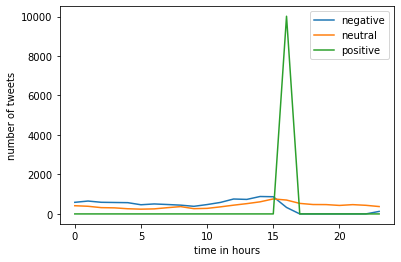

In [41]:
df_plot1.plot()
plt.xlabel('time in hours')
plt.ylabel('number of tweets')

After visualizing tweets over time, we are analyzing the tweets behaviour when the tweets are posted with @tweet handles

In [43]:
negative_count = 0
neutral_count = 0
positive_count = 0
tweet_list = list(df['tweet'])
target_list = list(df['target'])
for i in range(len(df['tweet'])):
    if tweet_list[i].find('@') != -1:
        if target_list[i] == 4:
            positive_count += 1
        elif target_list[i] == 2:
            neutral_count += 1 
        else:
            negative_count += 1
at_counts = [positive_count, neutral_count, negative_count]

Text(0, 0.5, 'number of tweets')

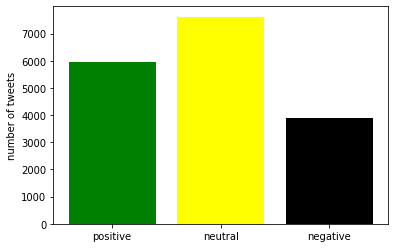

In [48]:
names = ['positive','neutral', 'negative']
values = [positive_count, neutral_count, negative_count]
plt.bar(names, values, color=['green', 'yellow', 'black'])
plt.ylabel('number of tweets')

In [39]:
# Twitter handles are removed
df['clean_tweet'] = df['tweet'].str.replace("@", "") 
# http links are removed
df['clean_tweet'] = df['clean_tweet'].str.replace(r"http\S+", "") 
# Punctuations, Numbers, and Special Characters are removed 
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ")
# Stop words removal
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
df['clean_tweet'] = df['clean_tweet'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


id                 date  \
5415  1516075373532004359  2022-04-18 15:25:11   
3697  1515755865143451656  2022-04-17 18:15:34   
2626  1516121934227984385  2022-04-18 18:30:11   
5620  1516165575860535298  2022-04-18 21:23:36   
5211  1516078767046856707  2022-04-18 15:38:40   

                                                  tweet         username  \
5415                              Depression eats soul.     AhmedKghafar   
3697  @TheRealWHG @Ccarr26 @RealCodyMallory Celtics ...     bobhope20105   
2626  @elyssae_ Only cap. Just like my depression dr...  BruhHoldMyPockt   
5620  I told @shattawalegh &amp; @AmgMedikal how I l...           kobsol   
5211  Band added: Grave Depression  https://t.co/rxt...       ma_updates   

      target                                        clean_tweet  
5415       0                               depression eats soul  
3697       2  therealwhg ccarr realcodymallory celtics defen...  
2626       0               elyssae cap like depression drinking  
5620       4  told shattawalegh amp amgmedikal love whyalway...  
5211       0                        band added grave depression

In [41]:
#text tokenization and normalization
nltk.download('punkt')
df['clean_tweet'] = df['clean_tweet'].apply(lambda i: nltk.word_tokenize(i))
#Stemming
stemmer = PorterStemmer() 
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
#combining the words together
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x]))
#removing small words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


id                 date  \
5415  1516075373532004359  2022-04-18 15:25:11   
3697  1515755865143451656  2022-04-17 18:15:34   
2626  1516121934227984385  2022-04-18 18:30:11   
5620  1516165575860535298  2022-04-18 21:23:36   
5211  1516078767046856707  2022-04-18 15:38:40   

                                                  tweet         username  \
5415                              Depression eats soul.     AhmedKghafar   
3697  @TheRealWHG @Ccarr26 @RealCodyMallory Celtics ...     bobhope20105   
2626  @elyssae_ Only cap. Just like my depression dr...  BruhHoldMyPockt   
5620  I told @shattawalegh &amp; @AmgMedikal how I l...           kobsol   
5211  Band added: Grave Depression  https://t.co/rxt...       ma_updates   

      target                                        clean_tweet  
5415       0                                       depress soul  
3697       2  therealwhg ccarr realcodymallori celtic defens...  
2626       0                          elyssa like depress drink  
5620       4  told shattawalegh amgmedik love whyalwaysm sms...  
5211       0                                 band grave depress

In [42]:
df.isnull().sum()

id             0
date           0
tweet          0
username       0
target         0
clean_tweet    0
dtype: int64

The most common words in the final combined dataset is visualised in the word cloud

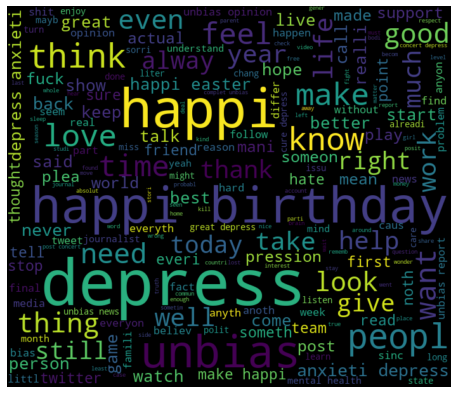

In [43]:
all_keywords = ' '.join([text for text in df['clean_tweet']])
wordcloud = WordCloud(width=700, height=600, random_state=21, max_font_size=100).generate(all_keywords) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

The most common words in the happy/positive dataset is visualised in the word cloud

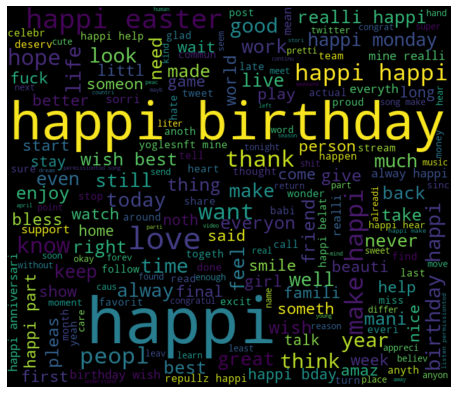

In [44]:
pos_words =' '.join([text for text in df['clean_tweet'][df['target'] == 4]])
wordcloud = WordCloud(width=700, height=600, random_state=21, max_font_size=100).generate(pos_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

The most common words in the neutral dataset is visualised in the word cloud

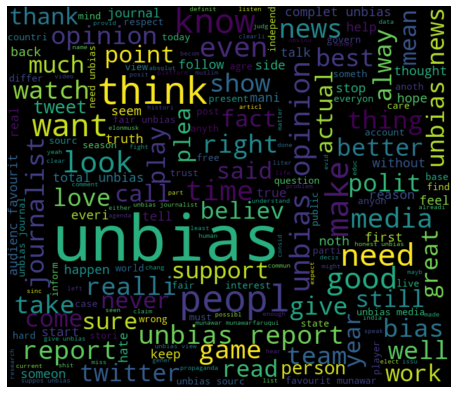

In [45]:
neu_words =' '.join([text for text in df['clean_tweet'][df['target'] == 2]])
wordcloud = WordCloud(width=700, height=600, random_state=21, max_font_size=100).generate(neu_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

The most common words in the depression dataset is visualised in the word cloud

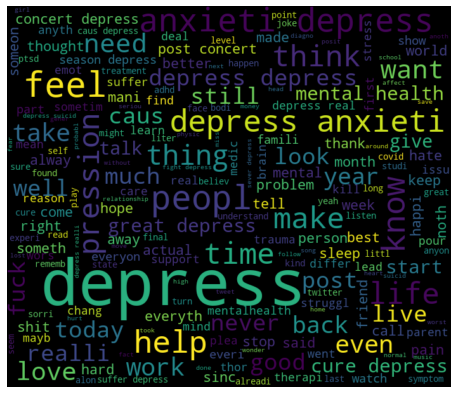

In [46]:
dep_words =' '.join([text for text in df['clean_tweet'][df['target'] == 0]])
wordcloud = WordCloud(width=700, height=600, random_state=21, max_font_size=100).generate(dep_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Support Vector Classifier

In [89]:
X = [tweet for tweet in df['clean_tweet']]

In [90]:
corpus = df['clean_tweet'].values.astype('U')
tfidf = TfidfVectorizer() 
tdidf_tensor = tfidf.fit_transform(corpus)

In [91]:
tdidf_tensor.shape

(30037, 47355)

In [92]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(tdidf_tensor, df['target'].values, test_size=0.3)


In [93]:
baseline_model = SVC()
baseline_model.fit(x_train, y_train)

SVC()

In [97]:
predictions = baseline_model.predict(x_test)

In [98]:
Acc_SVC = accuracy_score(y_test, predictions)

In [99]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99867   0.99635   0.99751      3014
           2    0.92917   0.98323   0.95544      3042
           4    0.97918   0.92287   0.95019      2956

    accuracy                        0.96782      9012
   macro avg    0.96901   0.96748   0.96771      9012
weighted avg    0.96882   0.96782   0.96779      9012



### Naive Baye's Classifier

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, df.target, test_size=0.3, random_state = 42)

In [101]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [103]:
y_pred = nb.predict(x_test)
Acc_NBC = accuracy_score(y_pred, y_test)

In [104]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.8869285397248113
              precision    recall  f1-score   support

           0    0.83000   0.97423   0.89635      3027
           2    0.88637   0.91430   0.90012      2952
           4    0.97142   0.77316   0.86102      3033

    accuracy                        0.88693      9012
   macro avg    0.89593   0.88723   0.88583      9012
weighted avg    0.89606   0.88693   0.88570      9012



### SGD Classifier

In [105]:
from sklearn.linear_model import SGDClassifier
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [106]:
y_pred = sgd.predict(x_test)
acc_SGDC = accuracy_score(y_pred, y_test)

In [107]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99735   0.99537   0.99636      3027
           2    0.90889   0.99356   0.94934      2952
           4    0.99204   0.90406   0.94601      3033

    accuracy                        0.96405      9012
   macro avg    0.96610   0.96433   0.96390      9012
weighted avg    0.96659   0.96405   0.96401      9012



### Logistic Regression Classifier

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [110]:
y_pred = logreg.predict(x_test)
acc_Log =  accuracy_score(y_pred, y_test)

In [111]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.98755   0.99571   0.99161      3027
           2    0.97667   0.93598   0.95589      2952
           4    0.94315   0.97362   0.95814      3033

    accuracy                        0.96871      9012
   macro avg    0.96912   0.96843   0.96855      9012
weighted avg    0.96904   0.96871   0.96865      9012



### Random Forest Classifier

In [112]:
forest = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(criterion='gini',n_estimators=5, random_state=1, n_jobs=2)),
               ])

In [113]:
forest.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(n_estimators=5, n_jobs=2,
                                        random_state=1))])

In [116]:
y_pred = forest.predict(X_test)
acc_RTC =  accuracy_score(y_pred, y_test)

In [117]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.34567   0.41031   0.37523      3027
           2    0.33628   0.32249   0.32924      2952
           4    0.34196   0.29179   0.31489      3033

    accuracy                        0.34166      9012
   macro avg    0.34130   0.34153   0.33979      9012
weighted avg    0.34135   0.34166   0.33986      9012



### Conclusion

In [50]:
from prettytable import PrettyTable
x = PrettyTable()
x.title = " Model Comparision "
x.field_names = ['Model','Tokenizer', 'Accuracy']
x.add_row(["SVC","TFIDF","96.782"])
x.add_row(["Naive Baye's Classifier","TFIDF","88.693"])
x.add_row(["SGD Classifier","TFIDF","96.405"])
x.add_row(["Logistic Regression","TFIDF","96.871"])
x.add_row(["Random Forest Classifier","TFIDF","34.166"])

print(x)

+-------------------------------------------------+
|                Model Comparision                |
+--------------------------+-----------+----------+
|          Model           | Tokenizer | Accuracy |
+--------------------------+-----------+----------+
|           SVC            |   TFIDF   |  96.782  |
| Naive Baye's Classifier  |   TFIDF   |  88.693  |
|      SGD Classifier      |   TFIDF   |  96.405  |
|   Logistic Regression    |   TFIDF   |  96.871  |
| Random Forest Classifier |   TFIDF   |  34.166  |
+--------------------------+-----------+----------+


In [49]:
data = {'Model': ['SVC ', "Naive Baye's", 'SGD', 'Logistic Rgn', 'Random Forest'], 'Accuracy': [96.782, 88.693, 96.405, 96.871, 34.166]}

In [51]:
df4 = pd.DataFrame(data)

In [52]:
df4

Model  Accuracy
0           SVC     96.782
1   Naive Baye's    88.693
2            SGD    96.405
3   Logistic Rgn    96.871
4  Random Forest    34.166

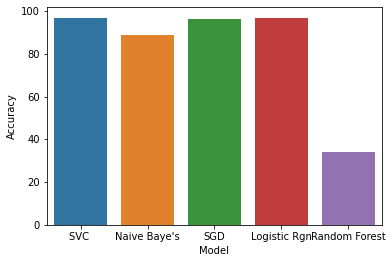

In [53]:
Acc_plot = sns.barplot(x = 'Model',
            y = 'Accuracy',
            data = df4)
